In [2]:
#Performing exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Preprocess the data to apply the MLR.

In [5]:
# Read the CSV file into a pandas DataFrame
import pandas as pd
df = pd.read_csv("ToyotaCorolla_-_MLR[1].csv")

# Display the first 5 rows of the DataFrame
display(df.head())

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


None

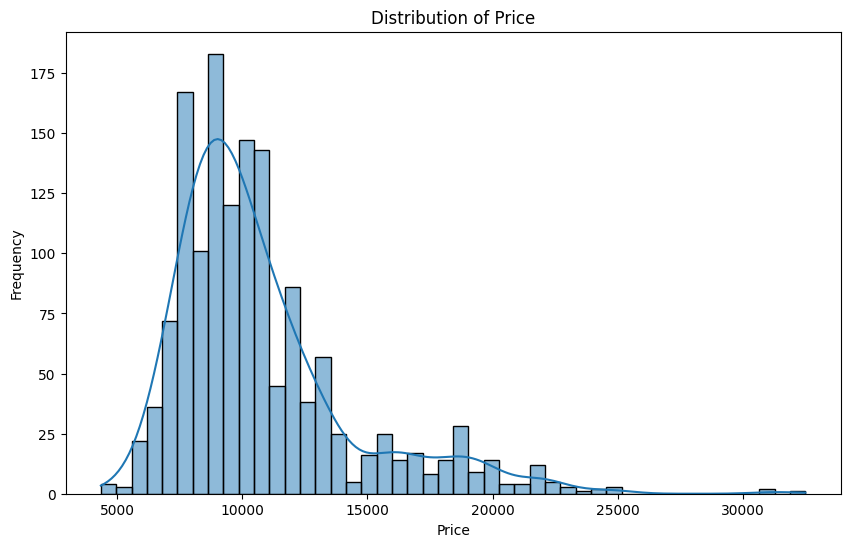

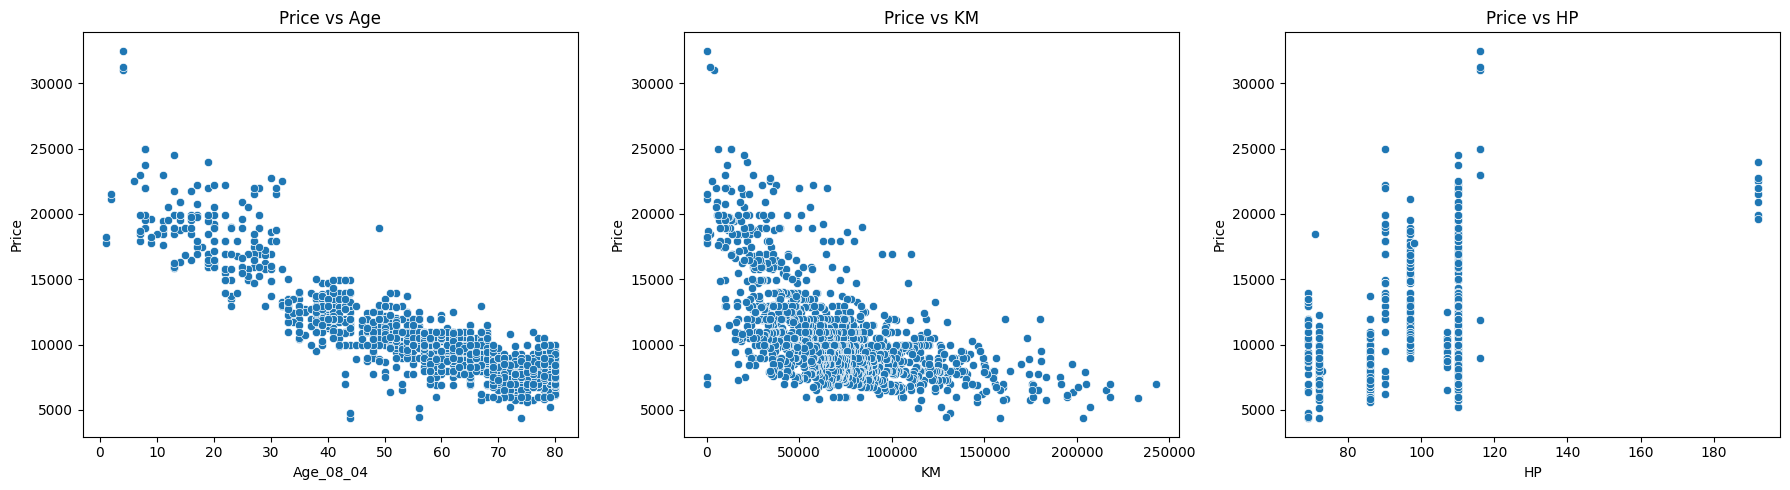

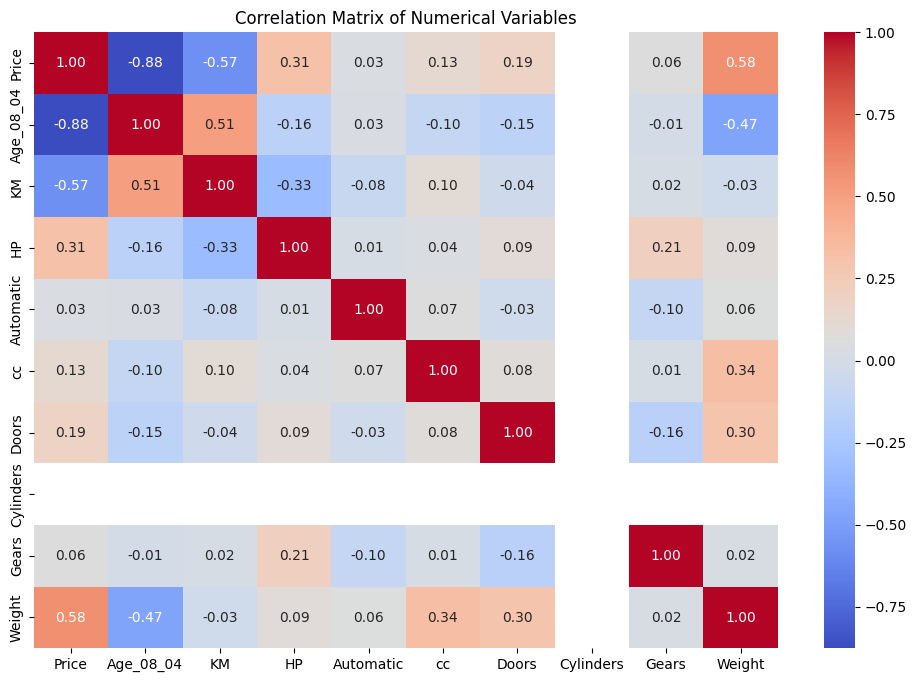

Categorical columns: Index(['Fuel_Type'], dtype='object')


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


In [6]:
# EDA
# Display descriptive statistics
display(df.describe())

# Display data types of each column
display(df.info())

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable ('Price')
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationships between independent variables and the target variable
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df['Age_08_04'], y=df['Price'])
plt.title('Price vs Age')
plt.xlabel('Age_08_04')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['KM'], y=df['Price'])
plt.title('Price vs KM')
plt.xlabel('KM')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['HP'], y=df['Price'])
plt.title('Price vs HP')
plt.xlabel('HP')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

In [7]:
### . Pre process the data to apply the MLR

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']



In [9]:
### Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns (excluding the target which is already dropped from X)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical features in training and testing sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows of the scaled training features
display(X_train.head())

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
899,0.329691,-0.254372,-1.027080,-0.244987,-0.601694,1.009250,0.0,-0.140622,-0.745518,False,True
881,0.649448,-0.194054,0.590140,-0.244987,0.041697,-0.040224,0.0,-0.140622,-0.745518,False,True
310,-0.842750,-0.802147,0.590140,-0.244987,0.041697,1.009250,0.0,-0.140622,0.139056,False,True
1145,1.022497,0.875038,0.590140,-0.244987,0.041697,1.009250,0.0,-0.140622,-0.057516,False,True
31,-1.802020,-0.893805,-0.285854,-0.244987,-0.387231,-1.089698,0.0,-0.140622,0.532200,False,True


In [11]:
### Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns (excluding the target which is already dropped from X)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical features in training and testing sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Convert boolean columns to numerical (0 or 1)
for col in ['Fuel_Type_Diesel', 'Fuel_Type_Petrol']:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype(int)
    if col in X_test.columns:
        X_test[col] = X_test[col].astype(int)

# Remove 'Cylinders' column as it has zero variance
if 'Cylinders' in X_train.columns:
    X_train = X_train.drop('Cylinders', axis=1)
if 'Cylinders' in X_test.columns:
    X_test = X_test.drop('Cylinders', axis=1)

# Function to calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by='VIF', ascending=False)

# Function to build OLS model and get p-values
def build_ols_model(X, y):
    X = sm.add_constant(X) # Add a constant for the intercept
    model = sm.OLS(y, X).fit()
    return model

# Model 1: Feature selection based on initial correlation and VIF
# Start with a set of features and iteratively remove those with high VIF or high p-values
features_model_1 = ['Age_08_04', 'KM', 'HP', 'Weight', 'Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
X_train_model_1 = X_train[features_model_1]

# Check VIF initially
print("Initial VIF for Model 1 features:")
display(calculate_vif(X_train_model_1))

# Build OLS model and check p-values
ols_model_1 = build_ols_model(X_train_model_1, y_train)
print("\nInitial OLS Summary for Model 1 features:")
print(ols_model_1.summary())

# Based on the VIF and p-values, refine feature set for Model 1
# (Example refinement - you would analyze the VIF and p-values to make informed decisions)
# Let's assume we remove 'Fuel_Type_Petrol' due to high p-value and potential multicollinearity with 'Fuel_Type_Diesel'
features_model_1_refined = ['Age_08_04', 'KM', 'HP', 'Weight', 'Automatic', 'Fuel_Type_Diesel']
X_train_model_1_refined = X_train[features_model_1_refined]
X_test_model_1_refined = X_test[features_model_1_refined]


# Build the final Linear Regression model for Model 1 with refined features
model_1 = LinearRegression()
model_1.fit(X_train_model_1_refined, y_train)

print("\nModel 1 (Refined) - Intercept:", model_1.intercept_)
print("Model 1 (Refined) - Coefficients:")
for feature, coef in zip(features_model_1_refined, model_1.coef_):
    print(f"  {feature}: {coef:.4f}")
print("-" * 30)


# Model 2: Feature selection based on a different initial set and statistical criteria
features_model_2 = ['Age_08_04', 'KM', 'HP', 'Doors', 'cc', 'Gears']
X_train_model_2 = X_train[features_model_2]

# Check VIF initially
print("Initial VIF for Model 2 features:")
display(calculate_vif(X_train_model_2))

# Build OLS model and check p-values
ols_model_2 = build_ols_model(X_train_model_2, y_train)
print("\nInitial OLS Summary for Model 2 features:")
print(ols_model_2.summary())

# Based on VIF and p-values, refine feature set for Model 2
# Let's assume we remove 'cc' due to high p-value
features_model_2_refined = ['Age_08_04', 'KM', 'HP', 'Doors', 'Gears']
X_train_model_2_refined = X_train[features_model_2_refined]
X_test_model_2_refined = X_test[features_model_2_refined]


# Build the final Linear Regression model for Model 2 with refined features
model_2 = LinearRegression()
model_2.fit(X_train_model_2_refined, y_train)

print("\nModel 2 (Refined) - Intercept:", model_2.intercept_)
print("Model 2 (Refined) - Coefficients:")
for feature, coef in zip(features_model_2_refined, model_2.coef_):
    print(f"  {feature}: {coef:.4f}")
print("-" * 30)


# Model 3: Starting with all features and performing step-wise selection (example using p-values)
X_train_model_3 = X_train.copy()
X_test_model_3 = X_test.copy()
features_model_3 = X_train_model_3.columns.tolist()

# Stepwise selection (Backward Elimination based on p-values)
# Note: This is a simplified example of backward elimination
while True:
    ols_model_3 = build_ols_model(X_train_model_3[features_model_3], y_train)
    p_values = ols_model_3.pvalues.drop('const') # Drop p-value for the constant
    max_p_value = p_values.max()

    if max_p_value > 0.05: # Set a significance level (e.g., 0.05)
        weakest_feature = p_values.idxmax()
        features_model_3.remove(weakest_feature)
        print(f"Removed feature '{weakest_feature}' with p-value {max_p_value:.4f}")
    else:
        break

print("\nFinal features for Model 3 after stepwise elimination:", features_model_3)

# Build the final Linear Regression model for Model 3 with selected features
X_train_model_3_refined = X_train_model_3[features_model_3]
X_test_model_3_refined = X_test_model_3[features_model_3]

model_3 = LinearRegression()
model_3.fit(X_train_model_3_refined, y_train)

print("\nModel 3 (Stepwise) - Intercept:", model_3.intercept_)
print("Model 3 (Stepwise) - Coefficients:")
for feature, coef in zip(features_model_3, model_3.coef_):
    print(f"  {feature}: {coef:.4f}")
print("-" * 30)

Initial VIF for Model 1 features:


,feature,VIF
5,Fuel_Type_Diesel,3.957106
3,Weight,3.357255
2,HP,2.200748
0,Age_08_04,1.950970
1,KM,1.922193
6,Fuel_Type_Petrol,1.400742
4,Automatic,1.081361



Initial OLS Summary for Model 1 features:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1080.
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:15:56   Log-Likelihood:                -9868.7
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1140   BIC:                         1.979e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

,feature,VIF
1,KM,1.547992
0,Age_08_04,1.407945
2,HP,1.205701
5,Gears,1.089634
3,Doors,1.068549
4,cc,1.044758



Initial OLS Summary for Model 2 features:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     849.4
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:15:56   Log-Likelihood:                -10060.
No. Observations:                1148   AIC:                         2.013e+04
Df Residuals:                    1141   BIC:                         2.017e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:
### TASK:4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate Model 1
y_pred_model_1 = model_1.predict(X_test_model_1_refined)
r2_model_1 = r2_score(y_test, y_pred_model_1)
mae_model_1 = mean_absolute_error(y_test, y_pred_model_1)
mse_model_1 = mean_squared_error(y_test, y_pred_model_1)
rmse_model_1 = np.sqrt(mse_model_1)

print("Model 1 Performance Metrics:")
print(f"  R-squared: {r2_model_1:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_model_1:.2f}")
print(f"  Mean Squared Error (MSE): {mse_model_1:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_model_1:.2f}")
print("-" * 30)

# Evaluate Model 2
y_pred_model_2 = model_2.predict(X_test_model_2_refined)
r2_model_2 = r2_score(y_test, y_pred_model_2)
mae_model_2 = mean_absolute_error(y_test, y_pred_model_2)
mse_model_2 = mean_squared_error(y_test, y_pred_model_2)
rmse_model_2 = np.sqrt(mse_model_2)

print("Model 2 Performance Metrics:")
print(f"  R-squared: {r2_model_2:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_model_2:.2f}")
print(f"  Mean Squared Error (MSE): {mse_model_2:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_model_2:.2f}")
print("-" * 30)

# Evaluate Model 3
y_pred_model_3 = model_3.predict(X_test_model_3_refined)
r2_model_3 = r2_score(y_test, y_pred_model_3)
mae_model_3 = mean_absolute_error(y_test, y_pred_model_3)
mse_model_3 = mean_squared_error(y_test, y_pred_model_3)
rmse_model_3 = np.sqrt(mse_model_3)

print("Model 3 Performance Metrics:")
print(f"  R-squared: {r2_model_3:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_model_3:.2f}")
print(f"  Mean Squared Error (MSE): {mse_model_3:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_model_3:.2f}")
print("-" * 30)

Model 1 Performance Metrics:
  R-squared: 0.8380
  Mean Absolute Error (MAE): 997.85
  Mean Squared Error (MSE): 2162116.42
  Root Mean Squared Error (RMSE): 1470.41
------------------------------
Model 2 Performance Metrics:
  R-squared: 0.8147
  Mean Absolute Error (MAE): 1092.90
  Mean Squared Error (MSE): 2472225.92
  Root Mean Squared Error (RMSE): 1572.33
------------------------------
Model 3 Performance Metrics:
  R-squared: 0.8351
  Mean Absolute Error (MAE): 997.81
  Mean Squared Error (MSE): 2199733.57
  Root Mean Squared Error (RMSE): 1483.15
------------------------------


In [17]:
### TASK:5.Apply Lasso and Ridge methods on the model.

In [18]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Instantiate Lasso and Ridge models
# Using a relatively small alpha value initially; this can be tuned later
lasso_model = Lasso(alpha=0.1, random_state=42)
ridge_model = Ridge(alpha=1.0, random_state=42)

# We will apply Lasso and Ridge to Model 3's feature set as it uses all features
X_train_reg = X_train
X_test_reg = X_test

# Fit the Lasso model to the training data
lasso_model.fit(X_train_reg, y_train)

# Fit the Ridge model to the training data
ridge_model.fit(X_train_reg, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test_reg)
y_pred_ridge = ridge_model.predict(X_test_reg)

# Evaluate Lasso model performance
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Model Performance Metrics:")
print(f"  R-squared: {r2_lasso:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"  Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print("-" * 30)

# Evaluate Ridge model performance
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge Model Performance Metrics:")
print(f"  R-squared: {r2_ridge:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"  Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print("-" * 30)

# Examine and compare coefficients
print("Lasso Model Coefficients:")
for feature, coef in zip(X_train_reg.columns, lasso_model.coef_):
    print(f"  {feature}: {coef:.4f}")
print("-" * 30)

print("Ridge Model Coefficients:")
for feature, coef in zip(X_train_reg.columns, ridge_model.coef_):
    print(f"  {feature}: {coef:.4f}")
print("-" * 30)

print("Linear Regression Model 3 Coefficients (for comparison):")
for feature, coef in zip(X_train.columns, model_3.coef_):
    print(f"  {feature}: {coef:.4f}")
print("-" * 30)

Lasso Model Performance Metrics:
  R-squared: 0.8350
  Mean Absolute Error (MAE): 990.90
  Mean Squared Error (MSE): 2202045.40
  Root Mean Squared Error (RMSE): 1483.93
------------------------------
Ridge Model Performance Metrics:
  R-squared: 0.8353
  Mean Absolute Error (MAE): 990.73
  Mean Squared Error (MSE): 2197493.74
  Root Mean Squared Error (RMSE): 1482.39
------------------------------
Lasso Model Coefficients:
  Age_08_04: -2267.3015
  KM: -611.9534
  HP: 208.9740
  Automatic: 34.4597
  cc: -14.1472
  Doors: -57.1467
  Gears: 109.2736
  Weight: 1315.6986
  Fuel_Type_Diesel: -65.0804
  Fuel_Type_Petrol: 1369.7165
------------------------------
Ridge Model Coefficients:
  Age_08_04: -2264.2901
  KM: -616.6252
  HP: 210.4462
  Automatic: 34.9920
  cc: -14.1436
  Doors: -55.7937
  Gears: 110.2029
  Weight: 1311.1653
  Fuel_Type_Diesel: -124.8972
  Fuel_Type_Petrol: 1290.1834
------------------------------
Linear Regression Model 3 Coefficients (for comparison):
  Age_08_04: -